In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [93]:
#pip install torch

In [5]:
load_activity_map = lambda: {
    0: 'transient',
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'Nordic_walking',
    9: 'watching_TV',
    10: 'computer_work',
    11: 'car driving',
    12: 'ascending_stairs',
    13: 'descending_stairs',
    16: 'vacuum_cleaning',
    17: 'ironing',
    18: 'folding_laundry',
    19: 'house_cleaning',
    20: 'playing_soccer',
    24: 'rope_jumping'
}


In [6]:
generate_three_IMU = lambda name: [f"{name}_x", f"{name}_y", f"{name}_z"]

generate_four_IMU = lambda name: [f"{name}_x", f"{name}_y", f"{name}_z", f"{name}_w"]

generate_cols_IMU = lambda name: [
    f"{name}_temperature",
    *generate_three_IMU(f"{name}_3D_acceleration_16"),
    *generate_three_IMU(f"{name}_3D_acceleration_6"),
    *generate_three_IMU(f"{name}_3D_gyroscope"),
    *generate_three_IMU(f"{name}_3D_magnetometer"),
    *generate_four_IMU(f"{name}_4D_orientation")
]

load_IMU = lambda: [
    'time_stamp', 'activity_id', 'heart_rate',
    *generate_cols_IMU('hand'),
    *generate_cols_IMU('chest'),
    *generate_cols_IMU('ankle')
]
def load_subjects(root='subject'):
    dfs = []
    cols = load_IMU()
    
    for i in range(101, 110):
        path = f"{root}{i}.dat"
        subject = pd.read_table(path, header=None, sep='\s+')
        subject.columns = cols 
        subject['id'] = i
        dfs.append(subject)
    
    output = pd.concat(dfs, ignore_index=True)
    return output

In [7]:
data = load_subjects()

In [8]:
data.head()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [9]:
data.tail()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109
2872532,100.23,0,161.0,25.1875,-4.09726,8.15642,3.29961,-4.73244,8.82870,3.54305,...,0.011866,-0.042858,-46.2704,4.21475,0.247798,0.598119,0.033685,0.800188,-0.028602,109


In [10]:
rows_with_nan = data[data.isna().any(axis=1)]
print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
         time_stamp  activity_id  heart_rate  hand_temperature  \
1              8.39            0         NaN           30.0000   
2              8.40            0         NaN           30.0000   
3              8.41            0         NaN           30.0000   
4              8.42            0         NaN           30.0000   
5              8.43            0         NaN           30.0000   
...             ...          ...         ...               ...   
2872527      100.18            0         NaN           25.1875   
2872528      100.19            0         NaN           25.1875   
2872529      100.20            0         NaN           25.1875   
2872530      100.21            0         NaN           25.1875   
2872531      100.22            0         NaN           25.1875   

         hand_3D_acceleration_16_x  hand_3D_acceleration_16_y  \
1                          2.18837                    8.56560   
2                          2.37357                    8

In [11]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,1.045005e+02
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685818e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-8.267093e-02,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289348e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,1.020000e+02
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-4.249850e-03,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,1.050000e+02
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,8.296868e-02,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634432e-01,1.070000e+02
max,4.475630e+03,2.400000e+01,202.000000,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,1.090000e+02


In [12]:
# Replace 'NaN' strings with actual NaN values
data.replace('NaN', np.nan, inplace=True)

# Fill missing values in 'heart_rate' with the mean
heart_rate_mean = data['heart_rate'].mean()
data['heart_rate'].fillna(heart_rate_mean, inplace=True)

# For IMU data, fill missing values with the mean of each column
imu_columns = [col for col in data.columns if 'IMU' in col]
imu_means = data[imu_columns].mean()
data[imu_columns] = data[imu_columns].fillna(imu_means)


In [13]:
data.fillna(data.mean(), inplace=True)

In [14]:
data.isna().any()

time_stamp                    False
activity_id                   False
heart_rate                    False
hand_temperature              False
hand_3D_acceleration_16_x     False
hand_3D_acceleration_16_y     False
hand_3D_acceleration_16_z     False
hand_3D_acceleration_6_x      False
hand_3D_acceleration_6_y      False
hand_3D_acceleration_6_z      False
hand_3D_gyroscope_x           False
hand_3D_gyroscope_y           False
hand_3D_gyroscope_z           False
hand_3D_magnetometer_x        False
hand_3D_magnetometer_y        False
hand_3D_magnetometer_z        False
hand_4D_orientation_x         False
hand_4D_orientation_y         False
hand_4D_orientation_z         False
hand_4D_orientation_w         False
chest_temperature             False
chest_3D_acceleration_16_x    False
chest_3D_acceleration_16_y    False
chest_3D_acceleration_16_z    False
chest_3D_acceleration_6_x     False
chest_3D_acceleration_6_y     False
chest_3D_acceleration_6_z     False
chest_3D_gyroscope_x        

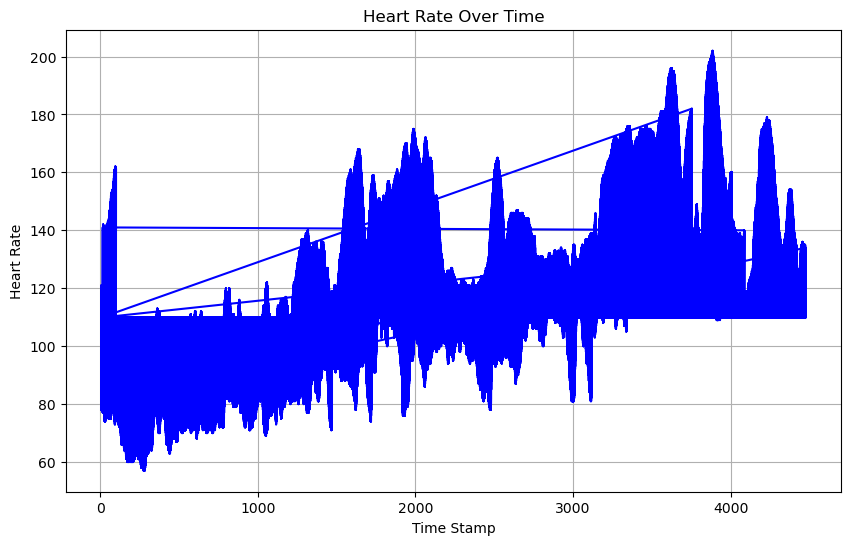

In [15]:
# Plot heart rate over time
plt.figure(figsize=(10, 6))
plt.plot(data['time_stamp'], data['heart_rate'], color='blue')
plt.title('Heart Rate Over Time')
plt.xlabel('Time Stamp')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


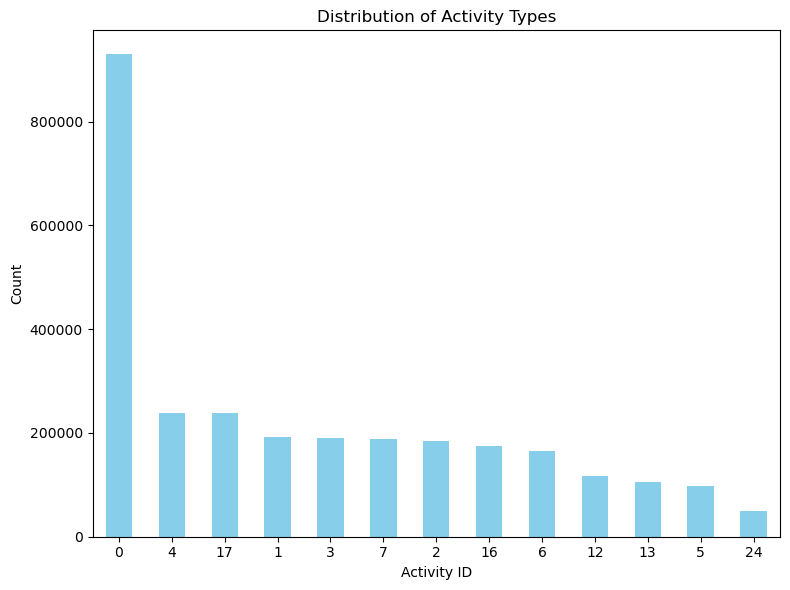

In [17]:
activity_counts = data['activity_id'].value_counts()

plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.title('Distribution of Activity Types')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

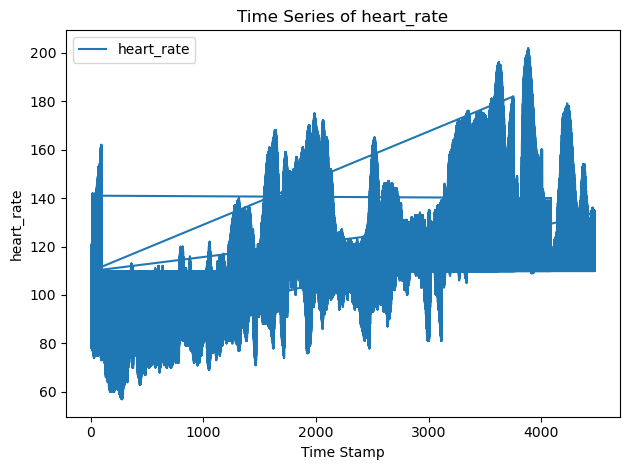

In [18]:
# Ploting heart_rate sensor
sensor_name = 'heart_rate'

# Assuming the first column is 'time_stamp'
time_series = data[['time_stamp', sensor_name]]
time_series.plot(x='time_stamp', y=sensor_name, kind='line')
plt.xlabel('Time Stamp')
plt.ylabel(sensor_name)
plt.title(f'Time Series of {sensor_name}')
plt.tight_layout()
plt.show()

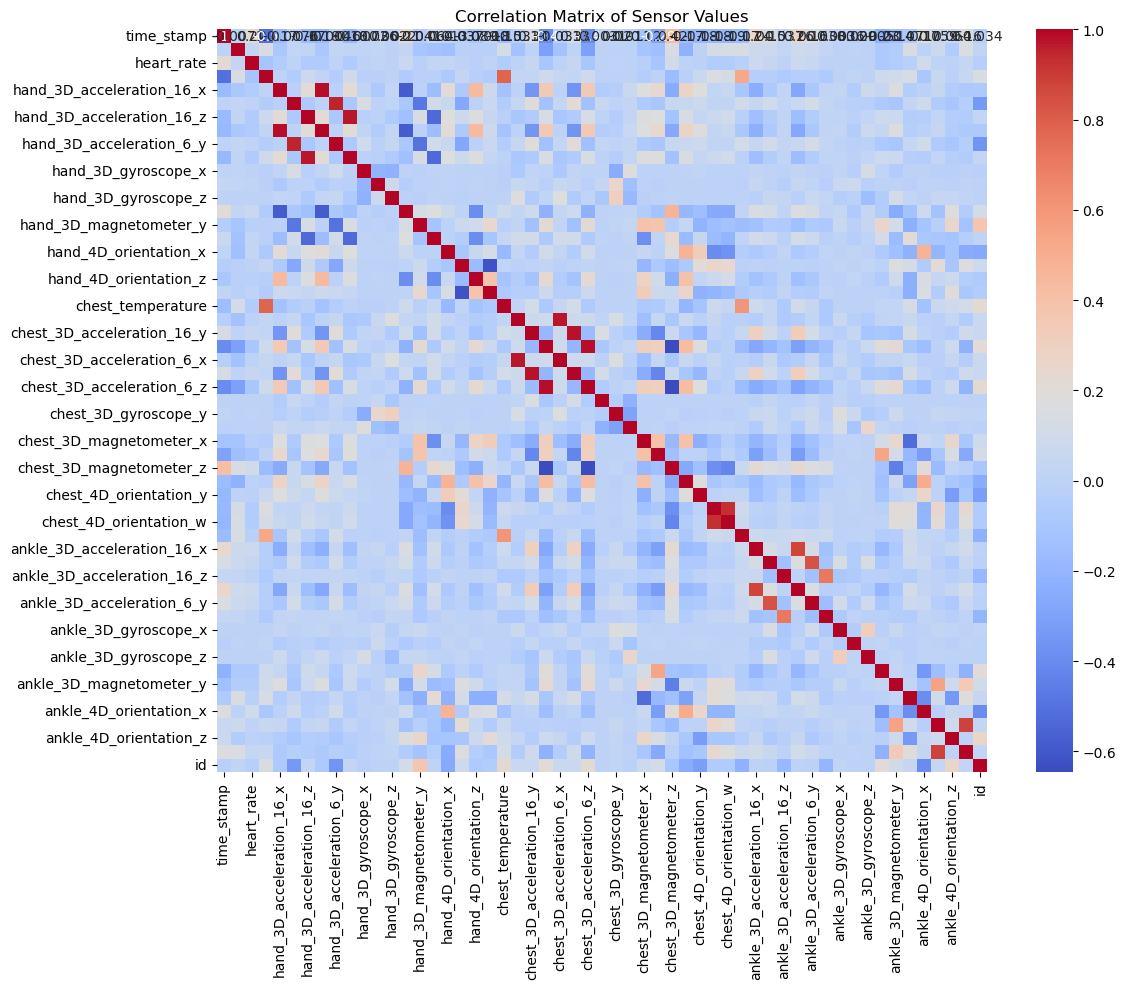

In [19]:
import seaborn as sns
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Using seaborn for heatmap
plt.title('Correlation Matrix of Sensor Values')
plt.tight_layout()
plt.show()

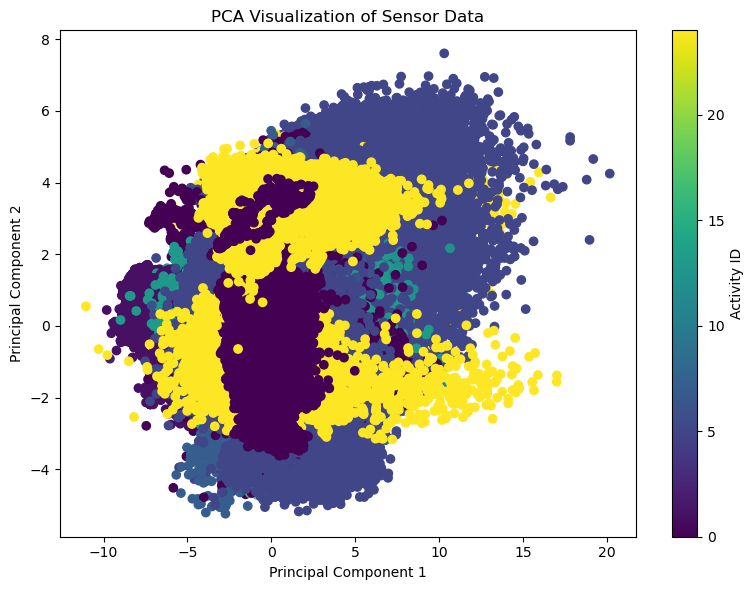

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features (sensor values) for PCA
features = data.columns[2:]  

# Standardize data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

pca = PCA(n_components=2)  # Choose the number of principal components
pca_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data['activity_id'], cmap='viridis')  # Color by activity ID
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Sensor Data')
plt.colorbar(label='Activity ID')
plt.tight_layout()
plt.show()


In [24]:
data.head()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.000000,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,109.872508,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,109.872508,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,109.872508,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,109.872508,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


In [25]:
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('Cleaned_data.csv', index=False)  

# BID DATA WITH HADOOP AND APACHE SPARK

In [27]:
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("Select First 50 Rows") \
    .getOrCreate()

# Read the CSV data from HDFS into a DataFrame
df = spark.read.option("header", "true").option("inferSchema", "true").csv('hdfs://localhost:9000/CA1/Cleaned_data.csv')

In [28]:
# Show the DataFrame schema to verify correct data types
df.printSchema()

root
 |-- time_stamp: double (nullable = true)
 |-- activity_id: integer (nullable = true)
 |-- heart_rate: double (nullable = true)
 |-- hand_temperature: double (nullable = true)
 |-- hand_3D_acceleration_16_x: double (nullable = true)
 |-- hand_3D_acceleration_16_y: double (nullable = true)
 |-- hand_3D_acceleration_16_z: double (nullable = true)
 |-- hand_3D_acceleration_6_x: double (nullable = true)
 |-- hand_3D_acceleration_6_y: double (nullable = true)
 |-- hand_3D_acceleration_6_z: double (nullable = true)
 |-- hand_3D_gyroscope_x: double (nullable = true)
 |-- hand_3D_gyroscope_y: double (nullable = true)
 |-- hand_3D_gyroscope_z: double (nullable = true)
 |-- hand_3D_magnetometer_x: double (nullable = true)
 |-- hand_3D_magnetometer_y: double (nullable = true)
 |-- hand_3D_magnetometer_z: double (nullable = true)
 |-- hand_4D_orientation_x: double (nullable = true)
 |-- hand_4D_orientation_y: double (nullable = true)
 |-- hand_4D_orientation_z: double (nullable = true)
 |-- h

In [29]:
# Register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("data_table")

24/04/04 19:20:44 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [30]:
# Use Spark SQL to select the first 50 rows
result = spark.sql("SELECT * FROM data_table LIMIT 10")

In [31]:
# Show the results
result.show()

+----------+-----------+------------------+----------------+-------------------------+-------------------------+-------------------------+------------------------+------------------------+------------------------+-------------------+-------------------+-------------------+----------------------+----------------------+----------------------+---------------------+---------------------+---------------------+---------------------+-----------------+--------------------------+--------------------------+--------------------------+-------------------------+-------------------------+-------------------------+--------------------+--------------------+--------------------+-----------------------+-----------------------+-----------------------+----------------------+----------------------+----------------------+----------------------+-----------------+--------------------------+--------------------------+--------------------------+-------------------------+-------------------------+---------------

In [32]:
# Select only the activity_id column
activity_ids = spark.sql("SELECT DISTINCT activity_id FROM data_table")

# Show the result
activity_ids.show()

+-----------+
|activity_id|
+-----------+
|         12|
|          1|
|         13|
|         16|
|          6|
|          3|
|          5|
|         17|
|          4|
|          7|
|          2|
|          0|
|         24|
+-----------+



In [35]:
total_rows_activity_1 = spark.sql("""
    SELECT COUNT(*) AS total_rows
    FROM data_table
    WHERE activity_id IN (1, 12, 13, 16, 6, 3, 5, 17, 4, 7, 2, 0, 24)
""")

# Show the result
total_rows_activity_1.show()


+----------+
|total_rows|
+----------+
|   2872533|
+----------+



In [36]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number, col

In [37]:
# Define a window spec partitioned by `activity_id` and ordered by some column, e.g., `time_stamp`
windowSpec = Window.partitionBy("activity_id").orderBy("time_stamp")

# Use row_number over the window spec to assign row numbers within each activity_id partition
df_with_row_number = df.withColumn("row_number", row_number().over(windowSpec))

In [38]:
# Filter to keep only the first 1000 rows for each activity_id
filtered_df = df_with_row_number.filter(col("row_number") <= 1000)

# Drop the row_number column as it's no longer needed
result_df = filtered_df.drop("row_number")

In [39]:
# Save the result into a CSV file, adjust path as needed
result_df.write.option("header", "true").mode("overwrite").csv("hdfs://localhost:9000/CA1/first_1000_rows_per_activity_id")

In [40]:
# Stop the Spark session
spark.stop()

In [117]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder \
    .appName("Read CSV from HDFS into Pandas") \
    .getOrCreate()

# Read the CSV file from HDFS into a Spark DataFrame
spark_df = spark.read.csv("hdfs://localhost:9000/CA1/first_1000_rows_per_activity_id", header=True, inferSchema=True)

In [118]:
# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = spark_df.toPandas()

In [128]:
# Show the first few rows of the Pandas DataFrame
pandas_df.head()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,2800.09,6,109.872508,31.3125,-4.83882,-2.22952,8.01900,-4.77164,-2.25172,8.24860,...,-0.032388,0.032441,-32.5518,-0.728426,-3.24401,0.684856,-0.003602,0.728638,0.006801,108
1,2800.10,6,109.872508,31.3125,-4.87340,-2.34204,8.13432,-4.78671,-2.25161,8.24862,...,-0.017958,-0.014653,-32.6901,-0.076970,-2.96159,0.684789,-0.002732,0.728710,0.006221,108
2,2800.11,6,109.872508,31.3125,-4.83133,-2.11403,8.21115,-4.83129,-2.22105,8.29390,...,-0.013536,0.006649,-32.6885,-0.594540,-3.81198,0.684770,-0.003301,0.728725,0.006307,108
3,2800.12,6,109.872508,31.3125,-4.94443,-2.26457,8.24846,-4.80102,-2.16090,8.24843,...,-0.005900,0.009910,-32.6807,-0.592834,-3.10279,0.684780,-0.003762,0.728710,0.006619,108
4,2800.13,6,109.872508,31.3125,-4.80023,-2.30536,8.05832,-4.81685,-2.23631,8.23351,...,-0.023670,-0.021741,-32.8100,-0.586805,-3.24508,0.684715,-0.004245,0.728767,0.006763,108


In [129]:
# Stop the Spark session
spark.stop()

# DATA ANALYTICS WITH PYTORCH

In [121]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# ANN

In [130]:
# Split features and target variable
features = pandas_df.drop('activity_id', axis=1)
target = pandas_df['activity_id']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# One-hot encode the target variables
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.to_numpy().reshape(-1, 1))



/home/hduser/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [131]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_encoded)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_encoded)

# Create PyTorch datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_dataset, batch_size=64)


In [132]:
class ANNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANNModel, self).__init__()
        self.layer1 = nn.Linear(input_size, 17)
        self.layer2 = nn.Linear(17, 17)
        self.output_layer = nn.Linear(17, output_size)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [133]:
# Define the model
input_size = X_train_scaled.shape[1]
output_size = y_train_encoded.shape[1]
model = ANNModel(input_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
epochs = 10
for epoch in range(epochs):
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        _, labels = torch.max(targets.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()
        
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_predictions * 100
    print(f'Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')



Epoch 1/10, Loss: 2.0340, Accuracy: 40.03%
Epoch 2/10, Loss: 0.6655, Accuracy: 84.41%
Epoch 3/10, Loss: 0.2427, Accuracy: 95.96%
Epoch 4/10, Loss: 0.0979, Accuracy: 98.85%
Epoch 5/10, Loss: 0.0465, Accuracy: 99.57%
Epoch 6/10, Loss: 0.0264, Accuracy: 99.79%
Epoch 7/10, Loss: 0.0170, Accuracy: 99.90%
Epoch 8/10, Loss: 0.0117, Accuracy: 99.92%
Epoch 9/10, Loss: 0.0084, Accuracy: 99.95%
Epoch 10/10, Loss: 0.0063, Accuracy: 99.97%


In [134]:
# Make predictions on a small test set
test_data = X_test_tensor[:2]
with torch.no_grad():
    model.eval()
    predictions = model(test_data)
    predicted_classes = torch.argmax(predictions, axis=1)

# Print sample predicted activities
print("Sample predicted activities:")
for i, prediction in enumerate(predicted_classes):
    print(f"Sample {i+1}: Predicted activity - {prediction.item()}")

Sample predicted activities:
Sample 1: Predicted activity - 8
Sample 2: Predicted activity - 3


In [135]:
# Define the model with the correct input size
model = ANNModel(X_train_scaled.shape[1], y_train_encoded.shape[1])  

# Evaluate the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad(): 
    outputs = model(X_test_tensor)
    test_loss = criterion(outputs, y_test_tensor).item()

    _, predicted = torch.max(outputs.data, 1)
    _, true_labels = torch.max(y_test_tensor.data, 1)
    correct_predictions = (predicted == true_labels).sum().item()
    total_predictions = true_labels.size(0)
    test_accuracy = correct_predictions / total_predictions * 100

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 2.5911, Test Accuracy: 5.72%


# RNN

In [136]:
pandas_df.head()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,2800.09,6,109.872508,31.3125,-4.83882,-2.22952,8.01900,-4.77164,-2.25172,8.24860,...,-0.032388,0.032441,-32.5518,-0.728426,-3.24401,0.684856,-0.003602,0.728638,0.006801,108
1,2800.10,6,109.872508,31.3125,-4.87340,-2.34204,8.13432,-4.78671,-2.25161,8.24862,...,-0.017958,-0.014653,-32.6901,-0.076970,-2.96159,0.684789,-0.002732,0.728710,0.006221,108
2,2800.11,6,109.872508,31.3125,-4.83133,-2.11403,8.21115,-4.83129,-2.22105,8.29390,...,-0.013536,0.006649,-32.6885,-0.594540,-3.81198,0.684770,-0.003301,0.728725,0.006307,108
3,2800.12,6,109.872508,31.3125,-4.94443,-2.26457,8.24846,-4.80102,-2.16090,8.24843,...,-0.005900,0.009910,-32.6807,-0.592834,-3.10279,0.684780,-0.003762,0.728710,0.006619,108
4,2800.13,6,109.872508,31.3125,-4.80023,-2.30536,8.05832,-4.81685,-2.23631,8.23351,...,-0.023670,-0.021741,-32.8100,-0.586805,-3.24508,0.684715,-0.004245,0.728767,0.006763,108


In [145]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt




In [146]:
# Load dataset into a dictionary
df = pandas_df
scaler = StandardScaler()
feature_cols = [col for col in df.columns if col not in ['time_stamp', 'activity_id', 'id']]
X = scaler.fit_transform(df[feature_cols])

encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(df[['activity_id']])



/home/hduser/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [147]:
# Function to create sequences
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X, y, 10)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Custom Dataset class for sequences
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]



In [148]:
# Creating PyTorch datasets
train_dataset = SequenceDataset(X_train, y_train)
test_dataset = SequenceDataset(X_test, y_test)

# Creating data loaders for efficient batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define the PyTorch RNN model
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim // 2, batch_first=True)
        self.fc = nn.Linear(hidden_dim // 2, output_dim)
    
    def forward(self, x):
        x, _ = self.rnn(x)
        x, (hn, cn) = self.lstm(x)
        x = self.fc(x[:, -1, :])
        return x



In [149]:
# Initialize the model
model = RNNModel(X_seq.shape[2], 64, y_seq.shape[1])

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function with batch processing
def train_model(model, criterion, optimizer, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')



Epoch 1, Loss: 0.007400320549324109, Accuracy: 0.9987490377213241, Precision: 0.9987527816930706, Recall: 0.9987478675801607, F1: 0.9987495503485062
Epoch 2, Loss: 0.006440344588699654, Accuracy: 0.9987490377213241, Precision: 0.9987523922981273, Recall: 0.9987446909600846, F1: 0.9987479428870341
Epoch 3, Loss: 0.013835565521998869, Accuracy: 0.9969207082371054, Precision: 0.9969232593759437, Recall: 0.9969352424956308, F1: 0.9969284698932253
Epoch 4, Loss: 0.00696696471951422, Accuracy: 0.9986528098537336, Precision: 0.99865161396986, Recall: 0.9986492315506528, F1: 0.9986499944222291
Epoch 5, Loss: 0.004828145034379823, Accuracy: 0.999133949191686, Precision: 0.9991382707792419, Recall: 0.9991348221748618, F1: 0.9991361216197542
Epoch 6, Loss: 0.005317520360930886, Accuracy: 0.9987490377213241, Precision: 0.9987556434103193, Recall: 0.9987448072060877, F1: 0.9987495545851282
Epoch 7, Loss: 0.007743764192328725, Accuracy: 0.9983641262509623, Precision: 0.9983608869656722, Recall: 0.99

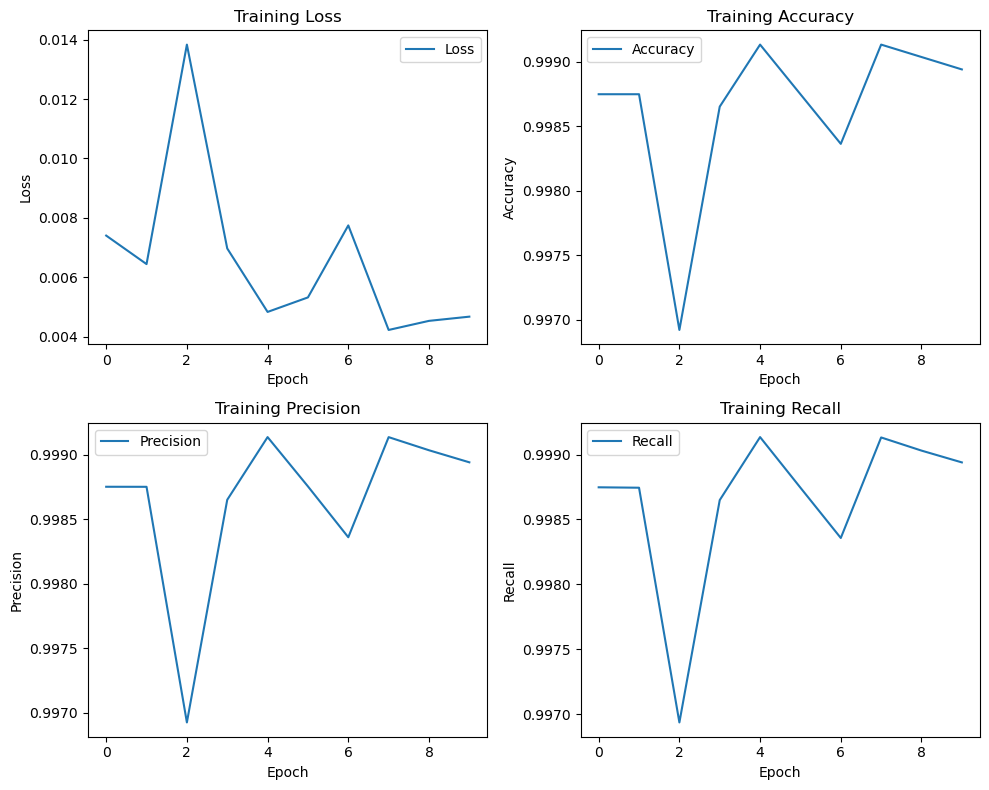

Test Loss: 0.009998265927850565, Test Accuracy: 0.9976905311778291, Precision: 0.9977435018384511, Recall: 0.9977655071352077, F1: 0.9977466121180819


In [155]:
# Stores training metrics per epoch
def train_model(model, criterion, optimizer, train_loader, test_loader, epochs=10):
    # Tracking performance metrics
    history = {'train_loss': [], 'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1': []}
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        true_labels = []
        predictions = []
        
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            true_labels.extend(torch.max(y_batch, 1)[1].cpu().numpy())
            predictions.extend(predicted.cpu().numpy())
        
        # Update history: This section calculates and stores training metrics for each epoch.
        # Calculate epoch-level metrics
        epoch_loss = train_loss / len(train_loader)
        epoch_acc = accuracy_score(true_labels, predictions)
        epoch_prec = precision_score(true_labels, predictions, average='macro', zero_division=0)
        epoch_recall = recall_score(true_labels, predictions, average='macro', zero_division=0)
        epoch_f1 = f1_score(true_labels, predictions, average='macro', zero_division=0)
        
        history['train_loss'].append(epoch_loss)
        history['train_accuracy'].append(epoch_acc)
        history['train_precision'].append(epoch_prec)
        history['train_recall'].append(epoch_recall)
        history['train_f1'].append(epoch_f1)
        
        print(f'Epoch {epoch+1}, Loss: {epoch_loss}, Accuracy: {epoch_acc}, Precision: {epoch_prec}, Recall: {epoch_recall}, F1: {epoch_f1}')
    
    return history

# Train and evaluate the model
history = train_model(model, criterion, optimizer, train_loader, test_loader, epochs=10)

# Plotting function for metrics
def plot_metrics(history):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(history['train_accuracy'], label='Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(history['train_precision'], label='Precision')
    plt.title('Training Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(history['train_recall'], label='Recall')
    plt.title('Training Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call to plot the metrics
plot_metrics(history)

evaluate_model(model, criterion, test_loader)


In [157]:
from sklearn.metrics import accuracy_score


def evaluate_model(model, criterion, test_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    correct = 0
    total = 0
    true_labels = []
    predictions = []
    
    with torch.no_grad():  # No gradients needed for evaluation
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == torch.max(y_batch, 1)[1]).sum().item()
            
            true_labels.extend(torch.max(y_batch, 1)[1].cpu().numpy())
            predictions.extend(predicted.cpu().numpy())
    
    # Calculate and print the evaluation metrics
    test_loss = total_loss / len(test_loader)
    test_accuracy = correct / total
    test_precision = precision_score(true_labels, predictions, average='macro', zero_division=0)
    test_recall = recall_score(true_labels, predictions, average='macro', zero_division=0)
    test_f1 = f1_score(true_labels, predictions, average='macro', zero_division=0)
    
    print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}, Precision: {test_precision}, Recall: {test_recall}, F1: {test_f1}')

evaluate_model(model, criterion, test_loader)

Test Loss: 0.009998265927850565, Test Accuracy: 0.9976905311778291, Precision: 0.9977435018384511, Recall: 0.9977655071352077, F1: 0.9977466121180819


In [144]:
def train_model(model, criterion, optimizer, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}')

def evaluate_model(model, criterion, test_loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, torch.max(y_batch, 1)[1])
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == torch.max(y_batch, 1)[1]).sum().item()
    print(f'Test Loss: {total_loss / len(test_loader)}, Test Accuracy: {correct / total}')

# Execute training and evaluation
train_model(model, criterion, optimizer, train_loader, epochs=10)
evaluate_model(model, criterion, test_loader)


Epoch 1, Loss: 0.008849577926830646
Epoch 2, Loss: 0.007236391646598974
Epoch 3, Loss: 0.007108692218338145
Epoch 4, Loss: 0.006442158490110851
Epoch 5, Loss: 0.00639034868746516
Epoch 6, Loss: 0.03851085674214788
Epoch 7, Loss: 0.011038542185921473
Epoch 8, Loss: 0.005383474008105924
Epoch 9, Loss: 0.004536186158871336
Epoch 10, Loss: 0.004399460683608187
Test Loss: 0.01229902390935799, Test Accuracy: 0.9965357967667436


# LSTM

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler


In [82]:

num_samples = 1000
num_features = 10
pandas_df = pd.DataFrame(np.random.randn(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])
pandas_df['target'] = np.random.randint(0, 2, size=(num_samples, 1))

X = pandas_df.iloc[:, :-1].values
y = pandas_df.iloc[:, -1].values

# Reshape y to be in the format expected by BCELoss
y = y.reshape(-1, 1)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for LSTM input
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining the Dataset
class SequenceDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = SequenceDataset(X_train, y_train)
test_dataset = SequenceDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Model, Loss, and Optimizer
model = LSTMModel(10, 64, 1)  
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [83]:
def train_model(model, criterion, optimizer, train_loader, epochs=10):
    model.train()
    metrics = {'loss': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    for epoch in range(epochs):
        total_loss = 0
        pred_labels = []
        true_labels = []
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            predicted = (outputs.data > 0.5).float()
            pred_labels.extend(predicted.view(-1).cpu().numpy())
            true_labels.extend(y_batch.view(-1).cpu().numpy())
        
        avg_loss = total_loss / len(train_loader)
        metrics['loss'].append(avg_loss)
        metrics['accuracy'].append(accuracy_score(true_labels, pred_labels))
        metrics['precision'].append(precision_score(true_labels, pred_labels, zero_division=0))
        metrics['recall'].append(recall_score(true_labels, pred_labels))
        metrics['f1'].append(f1_score(true_labels, pred_labels))
        
        print(f'Epoch {epoch+1}, Loss: {avg_loss}, Accuracy: {metrics["accuracy"][-1]}, Precision: {metrics["precision"][-1]}, Recall: {metrics["recall"][-1]}, F1: {metrics["f1"][-1]}')
    return metrics

# Train the model and retrieve metrics
metrics = train_model(model, criterion, optimizer, train_loader, epochs=10)

Epoch 1, Loss: 0.6948810724111704, Accuracy: 0.47, Precision: 0.4635036496350365, Recall: 0.6614583333333334, F1: 0.5450643776824035
Epoch 2, Loss: 0.6930283674826989, Accuracy: 0.4975, Precision: 0.4738372093023256, Recall: 0.4244791666666667, F1: 0.4478021978021978
Epoch 3, Loss: 0.6914663039720975, Accuracy: 0.54, Precision: 0.5344827586206896, Recall: 0.3229166666666667, F1: 0.4025974025974027
Epoch 4, Loss: 0.6897872548836929, Accuracy: 0.53125, Precision: 0.5230769230769231, Recall: 0.265625, F1: 0.35233160621761656
Epoch 5, Loss: 0.6890022250322195, Accuracy: 0.53875, Precision: 0.5405405405405406, Recall: 0.2604166666666667, F1: 0.35149384885764495
Epoch 6, Loss: 0.6872799534064072, Accuracy: 0.5525, Precision: 0.5722222222222222, Recall: 0.2682291666666667, F1: 0.3652482269503546
Epoch 7, Loss: 0.686464575620798, Accuracy: 0.56625, Precision: 0.5911330049261084, Recall: 0.3125, F1: 0.40885860306643956
Epoch 8, Loss: 0.6851357588401208, Accuracy: 0.57375, Precision: 0.597285067

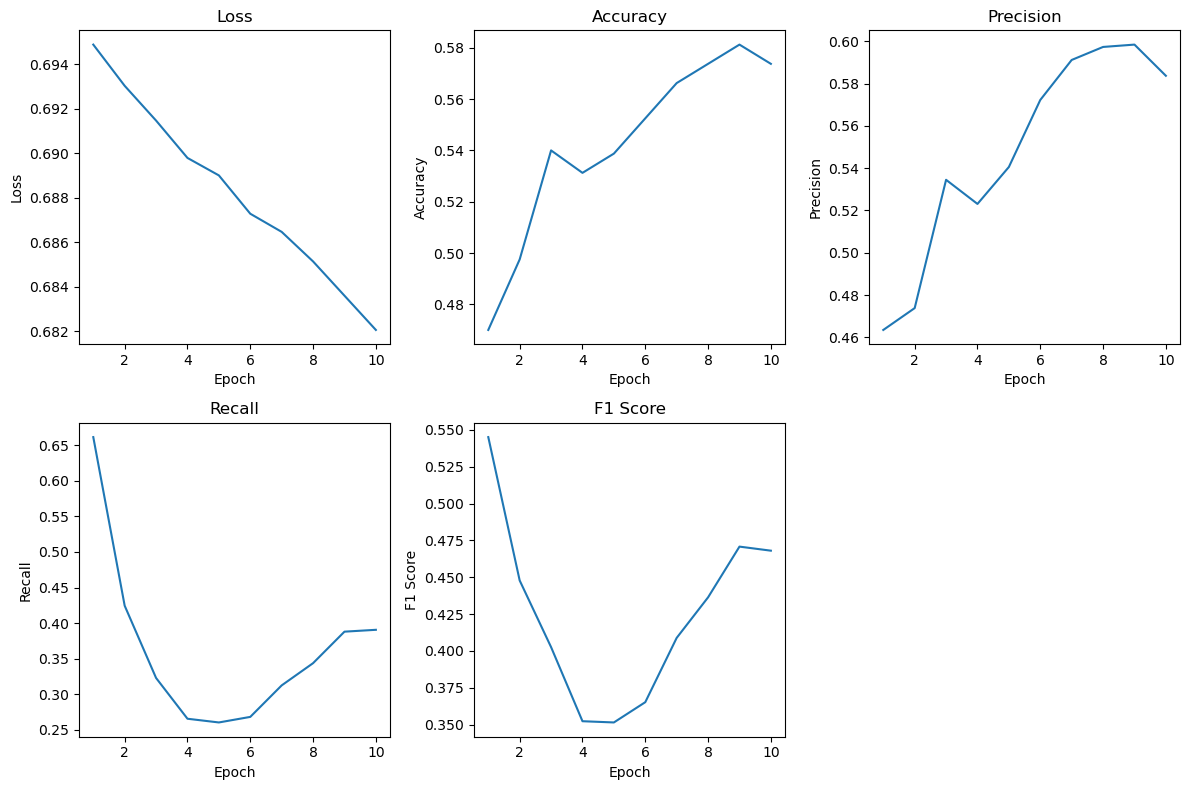

In [84]:


# Function to plot training metrics
def plot_metrics(metrics):
    epochs = range(1, len(metrics['loss']) + 1)
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 3, 1)
    plt.plot(epochs, metrics['loss'], label='Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    plt.subplot(2, 3, 2)
    plt.plot(epochs, metrics['accuracy'], label='Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.subplot(2, 3, 3)
    plt.plot(epochs, metrics['precision'], label='Precision')
    plt.title('Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    
    plt.subplot(2, 3, 4)
    plt.plot(epochs, metrics['recall'], label='Recall')
    plt.title('Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    
    plt.subplot(2, 3, 5)
    plt.plot(epochs, metrics['f1'], label='F1 Score')
    plt.title('F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1 Score')

    plt.tight_layout()
    plt.show()

# Plotting the metrics
plot_metrics(metrics)


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [105]:

# Define the LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        hn = hn.view(-1, self.fc.in_features)
        out = torch.sigmoid(self.fc(hn))
        return out

# These two lines define the number of samples (data points) and features (columns) for the dataset.
num_samples = 1000
num_features = 10
pandas_df = pd.DataFrame(np.random.randn(num_samples, num_features), columns=[f'feature_{i}' for i in range(num_features)])
pandas_df['target'] = np.random.randint(0, 2, size=(num_samples, 1))

X = pandas_df.iloc[:, :-1].values
y = pandas_df.iloc[:, -1].values

# Preprocess the dataset
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for LSTM input
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [106]:
# Sklearn-compatible wrapper for PyTorch LSTM model
class SklearnCompatPyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model_class=LSTMModel, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model_class = model_class
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
    
    def fit(self, X, y):
        self.model_ = self.model_class(X.shape[2], 64, 1)  # Adjust for your model's architecture
        self.optimizer_ = self.optimizer_class(self.model_.parameters(), lr=self.lr)
        dataset = TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
        loader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        self.model_.train()
        for _ in range(self.epochs):
            for X_batch, y_batch in loader:
                self.optimizer_.zero_grad()
                outputs = self.model_(X_batch).squeeze()
                loss = self.criterion(outputs, y_batch.squeeze())
                loss.backward()
                self.optimizer_.step()
        return self
    
    def predict_proba(self, X):
        self.model_.eval()
        with torch.no_grad():
            outputs = self.model_(torch.tensor(X, dtype=torch.float32)).squeeze()
        return outputs.numpy()
    
    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs > 0.5).astype(int)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)


In [108]:
# GridSearchCV for hyperparameter tuning
param_grid = {
    'lr': [0.01, 0.001, 0.0001],
    'batch_size': [32, 64, 128]
}
model = SklearnCompatPyTorchClassifier(epochs=20) 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train.ravel())

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'batch_size': 128, 'lr': 0.01}
Best score: 0.5399782227103339
